# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Data preparation pipeline

<img src="../images/data_preparation_pipeline.png" width="900" /><br />

## Data exploration

Data exploration มีขั้นตอนดังนี้

### Importing data

In [2]:
data = pd.read_csv("../data/India_air_quality.csv")
data

,stn_code,state,location,type,so2,no2,rspm,spm,pm2_5,date,rainfall
0,NaN,Andhra Pradesh,Hyderabad,Others,5.1,14.2,50.00,128.0,NaN,29/02/2008,NaN
1,229,Odisha,Rayagada,Industrial,2.0,14.5,36.00,54.0,NaN,08/04/2010,53.897548
2,631,Goa,Honda,Residential,5.0,11.0,42.00,19.0,NaN,10/11/2013,NaN
3,674,Karnataka,Davangere,Residential,6.0,9.0,302.00,NaN,NaN,02/01/2015,95.685937
4,NaN,West Bengal,Kolkata,Industrial,7.4,69.5,77.00,164.0,NaN,20/08/2007,83.049383
...,...,...,...,...,...,...,...,...,...,...,...
310026,376,Rajasthan,Jodhpur,Residential,5.0,21.0,244.00,NaN,NaN,16/12/2011,87.461929
310027,421,Punjab,Naya Nangal,Residential,7.0,16.0,78.67,NaN,NaN,05/05/2012,NaN
310028,17,Rajasthan,Kota,Industrial,9.0,49.0,111.00,NaN,NaN,21/02/2011,NaN
310029,NaN,Maharashtra,Nagpur,Others,10.0,25.3,125.00,198.0,NaN,02/09/2007,87.865203


### Dropping duplicates

เอาข้อมูลที่ซ้ำกันออกให้เหลือข้อมูลเดียวก่อนทำ spliting (แบ่ง dataset ออกเป็น training set กับ test set) เพื่อไม่ให้มีข้อมูลใน training set ไปอยู่ใน test set

In [3]:
# Check the number of duplicates
data.duplicated().sum()

400

In [4]:
# Remove duplicates
data = data.drop_duplicates()

### Splitting data

- มักจะแบ่ง dataset ออกเป็น training set (70%) กับ test set (30%)
- test set ต้องมีมากพอเพื่อที่จะใช้ represent model performance
- หากมีข้อมูลน้อยไป ต้องเพิ่มปริมาณข้อมูล
- เราสามารถลดสัดส่วนของ test set ได้ถ้ามีข้อมูลมาก
- `scikit-learn` มีหลาย method ที่ใช้แบ่งข้อมูล แต่ในที่นี้เราจะใช้ `sklearn.model_selection.train_test_split`

In [5]:
# แยก features (X) กับ target (y) ออกจากกัน
y = data['rspm']
X = data.drop(columns="rspm")

In [6]:
# Split the dataset
# train_size=0.7 => training dataset = 70% (test set = 30%)
# test_size=0.3 => test set = 30% (training dataset = 70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

`sklearn.model_selection.train_test_split` จะ split ข้อมูลอย่างสุ่ม หากต้องการให้ผลลัพธ์เหมือนเดิม ให้ใช้ `random_state=42`

### Exploratory Data Analysis (EDA)

เป็นการดู statistics ของ training set เพื่อทำความเข้าใจข้อมูล <span style="color: red;">(ห้ามทำกับ test set)</span>

In [7]:
# Check the data type
X_train.dtypes

stn_code     object
state        object
location     object
type         object
so2         float64
no2         float64
spm         float64
pm2_5       float64
date         object
rainfall    float64
dtype: object

In [8]:
# Find the statistics on the numerical values
X_train.describe()

,so2,no2,spm,pm2_5,rainfall
count,202025.000000,216741.000000,90875.000000,4583.000000,188881.000000
mean,11.133270,26.389450,217.544524,40.501726,79.911407
std,11.093978,17.986456,147.514219,30.202104,20.036673
min,0.000000,-66.400000,0.000000,4.000000,-24.682525
25%,5.000000,14.400000,110.333333,24.000000,66.362289
50%,8.200000,23.000000,184.000000,32.000000,79.861002
75%,14.000000,33.000000,289.000000,46.000000,93.447692
max,909.000000,876.000000,2610.000000,395.000000,166.455104


In [9]:
# Count different locations
X_train["location"].value_counts()

Nagpur         6060
Navi Mumbai    5037
Guwahati       4784
Nashik         4485
Pune           4354
               ... 
Bhuj              9
Nizamabad         8
Sarigam           7
Khajuraho         7
Gangtok           1
Name: location, Length: 287, dtype: int64

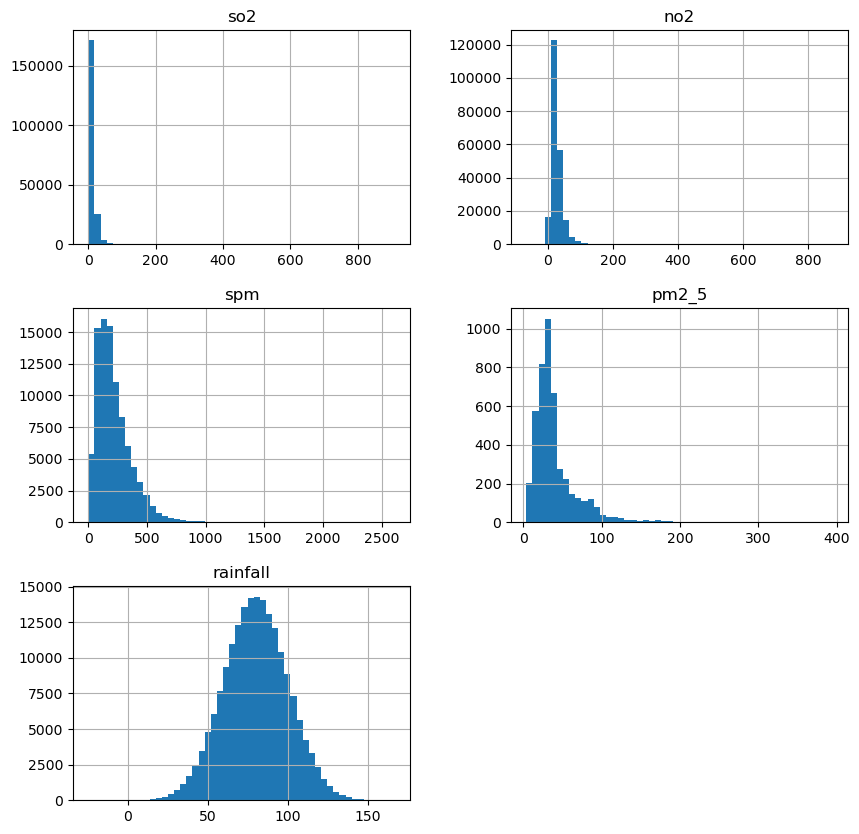

In [10]:
# Plot a histogram for numerical features
hist = X_train.hist(bins=50, figsize=(10, 10));

In [11]:
num_cols = X_train.select_dtypes(include=np.number).columns  # numerical columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns  # categorical columns

In [12]:
# Correlation matrix
corr = X_train[num_cols].corr()
corr

,so2,no2,spm,pm2_5,rainfall
so2,1.000000,0.342506,0.111831,0.030533,-0.001289
no2,0.342506,1.000000,0.341463,0.492185,-0.000142
spm,0.111831,0.341463,1.000000,NaN,-0.008428
pm2_5,0.030533,0.492185,NaN,1.000000,-0.027691
rainfall,-0.001289,-0.000142,-0.008428,-0.027691,1.000000


## Data pre-processing

### Dropping outliers/non-sense values

เอา outlier หรือ non-sense values ออก หรือแปลงเป็นค่า missing value (เช่น `NaN`, large negative (e.g., `-999`), `?`, `inf`) แล้วเอาออกทีหลังก็ได้

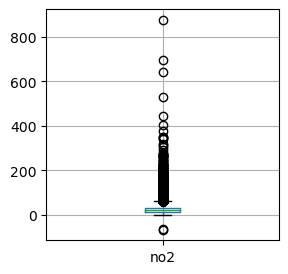

In [13]:
# จาก EDA จะเห็นว่ามีบางค่าใน "no2" กับ "rainfall" column ที่เป็นลบ (non-sense)
# Create boxplots
X_train[['no2']].boxplot(figsize=(3, 3));

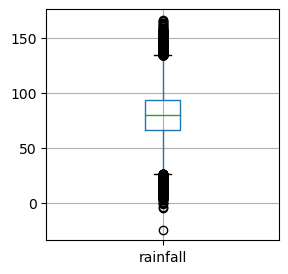

In [14]:
X_train[['rainfall']].boxplot(figsize=(3, 3));

In [15]:
# Drop row containing non-sense values
X_train = X_train.drop(X_train[(X_train['no2'] < 0) | (X_train['rainfall'] < 0)].index)
y_train = y_train[X_train.index]

### Handling missing values

จัดการกับ missing values หรือจะเก็บไว้ก็ได้ถ้ามีความหมาย
- ถ้าใน feature หนึ่งมีสัดส่วนของ missing value มากกว่า 30% ควรเอา column นั้นออก หรือเอาแถวที่มี missing value ใน column นั้นออก
- ถ้าใน feature หนึ่งมีสัดส่วนของ missing value น้อยกว่า 30% ควร impute (แทนที่) missing value ด้วย mean/median/mode
    - ใช้ `sklearn.impute.SimpleImputer`
    - Numerical data ที่ discrete หรือมีค่าที่ซ้ำเยอะเป็นพิเศษ ควรใช้ mode  
    - Categorical data บางอย่างไม่ควรถูกแทนด้วย mode แต่สามารถแทนด้วย `"not known"` หรืออะไรทำนองนี้ได้ เช่น สถานที่ หรือข้อมูลที่ไม่มี mode ที่โดดเด่น


In [16]:
# Find NaN percentage of each feature
nan_percentages = X_train.isnull().sum() / len(X_train) * 100
nan_percentages

stn_code    34.168151
state        0.000000
location     0.000000
type         0.047062
so2          6.789890
no2          0.000000
spm         58.072568
pm2_5       97.885888
date         0.001384
rainfall    12.854467
dtype: float64

In [17]:
# Drop features with missing values >30%
features_to_be_removed = nan_percentages[nan_percentages > 30].index
X_train = X_train.drop(columns=features_to_be_removed)

In [18]:
# Update
num_cols = X_train.select_dtypes(include=np.number).columns  # numerical columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns  # categorical columns

In [19]:
# Check the number of each category in the "type" feature
X_train["type"].value_counts()

Residential    91348
Industrial     72152
Others         45689
Sensitive       7443
Name: type, dtype: int64

In [20]:
# Replace NaN with the most generic type
X_train["type"].replace(np.nan, "Others", inplace=True)

In [21]:
# Instantiate a SimpleImputer object with strategy of choice
num_imputer = SimpleImputer(strategy="mean")

In [22]:
# Call the "fit" method on the object to compute the strategy for numerical features
# and store the strategy values as an attribute
num_imputer.fit(X_train[num_cols])

SimpleImputer()

In [23]:
# Call the "transform" method on the object to identify missing values
# and replace them with previously calculated strategy values
X_train[num_cols] = num_imputer.transform(X_train[num_cols])  

In [24]:
num_imputer.statistics_  # Strategy values

array([11.13318779, 26.39035904, 79.91341849])

เราสามารถรวม

`num_imputer.fit(X_train[num_cols])` <br />
`X_train[num_cols] = num_imputer.transform(X_train[num_cols])`

ได้เป็น

`X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])`

In [25]:
# Replace missing values in categorical features with the most frequent values
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

### Feature scaling

เป็นการแปลงข้อมูลจากหลาย ๆ แหล่งให้อยู่ใน scale เดียวกัน <span style="color: red;">แต่ไม่ต้อง scale target (`y`)</span>

มี 3 วิธีที่นิยม ได้แก่

#### Standardising

- ใช้ `sklearn.preprocessing.StandardScaler`
- ใช้ได้ดีที่สุดเมื่อข้อมูลกระจายตัวแบบ normal distribution
- ข้อมูลแต่ละแหล่งอาจมี range ไม่เท่ากันหลังจากถูก scaled 
- อ่อนไหวต่อ outlier
- Distort relative distances between feature values
    
$$z = \frac{x - mean}{std}$$

#### Robust scaling

- ใช้ `sklearn.preprocessing.RobustScaler`
- เหมือน standardizing แค่ไม่อ่อนไหวต่อ outlier เท่า
- ใช้ได้เมื่อข้อมูลไม่กระจายตัวแบบ normal distribution หรือกระจายตัวแบบ normal distribution แต่มี outlier
    
$$z = \frac{x - median}{IQR}$$
    
#### Normalising

- ใช้ `sklearn.preprocessing.MinMaxScaler`
- มีช่วงของข้อมูลหลังถูก scaled แน่นอน (0-1)
- ใช้ได้ดีไม่ว่าข้อมูลมีการกระจายตัวแบบใด
- ไม่ลดผลจาก outlier
- ไม่ลดความเบ้ (skewness) ของการกระจายตัวของข้อมูล
    
$$z = \frac{x - x_{min}}{x_{max} - x_{min}}$$


### Balancing datasets

ในการทำ classification task หากข้อมูล imbalanced จะทำให้ model ทำนาย class ที่มีข้อมูลน้อยกว่าได้แย่กว่า

สำหรับ binary classification task ถ้าสัดส่วนของข้อมูล class 1 : class 2 น้อยกว่า 30:70 จะถือว่า imbalanced

เพื่อทำให้ข้อมูล balanced เราจะทำสิ่งที่เรียกว่า balancing <span style="color: red;">เราจะทำ balancing เฉพาะกับ training set เท่านั้น</span>

#### Oversampling and undersampling

เราสามารถทำ balancing ได้ 2 วิธีหลัก
- ก็อปปี้ข้อมูลใน class ที่เล็กกว่า (<b>oversampling</b>)
- เอาข้อมูลแค่บางส่วนจาก class ที่ใหญ่กว่า (<b>undersampling</b>)

<img src="../images/over_under_sampling.png" width="600" /><br />

#### Synthetic Minority Over-sampling TEchnique – SMOTE

SMOTE เป็นวิธีการ oversampling ที่สร้างข้อมูลใหม่ใน class ที่เล็กกว่าโดยการเอาข้อมูลสองจุดที่ใกล้กันมาทำ linear combination กัน ได้ข้อมูลใหม่ (ไม่ใช่วิธี balancing ที่ดี)

<img src="../images/smote.png" width="600" /><br />

## Feature engineering

Feature engineering is a category of preprocessing that includes encoding, discretizing and creating new features.

### Creating / transforming features 

เช่น เอา feature หนึ่งมา take log หรือเอา 2 feature มาหารกัน
- Create additional information
- Reduce the number of features by combining them
- Change data distribution
- Potentially improve model performance

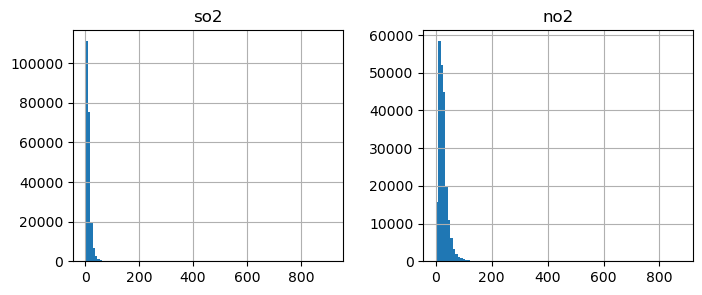

In [26]:
X_train[["so2", "no2"]].hist(bins=100, figsize=(8, 3));

In [27]:
# Transform "so2" and "no2" features by taking log (+0.001 to avoid log(0))
X_train["so2"] = np.log(X_train["so2"] + 0.001)
X_train["no2"] = np.log(X_train["no2"] + 0.001)

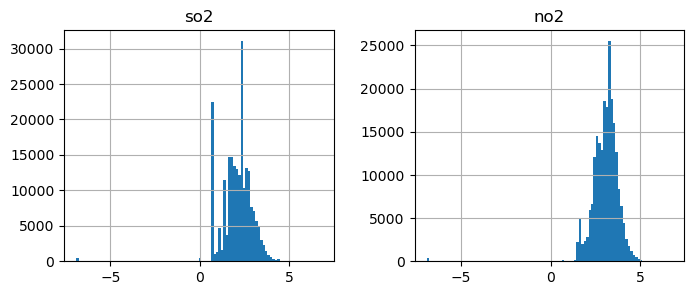

In [28]:
X_train[["so2", "no2"]].hist(bins=100, figsize=(8, 3));

### Discretizing / Binning

ทำเมื่อต้องการแปลงจาก regression task เป็น classification task
- ใช้ `pandas.cut`
- เช่น แปลงจากปริมาณฝุ่นเป็นการบอกว่ามีฝุ่นเยอะหรือน้อย

In [29]:
y_train_discretised = pd.cut(x=y_train,
                             bins=[y_train.min()-1, y_train.mean()-0.25*y_train.std(), y_train.max()+1], 
                             labels=['low', 'high'])

y_train_discretised

67566      low
295410    high
118557     low
227449     low
180266     low
          ... 
119927    high
259456     low
131993    high
146945     low
122007    high
Name: rspm, Length: 216734, dtype: category
Categories (2, object): ['low' < 'high']

### Encoding

แปลง non-numeric data เป็น numeric data ทำได้ 3 วิธี ได้แก่

#### Target encoding
    
- ใช้ `sklearn.preprocessing.LabelEncoder`
- ค่าที่ได้อาจถูกนำไปใช้แบบผิด ๆ เช่น สีน้ำเงิน เป็น 3 เท่าของสีแดง
       
<img src="../images/target_encoding.png" width="250" /><br />

#### One-hot encoding

- ใช้ `sklearn.preprocessing.OneHotEncoder`
- All columns are preserved.
- Can create colinearity between variables in linear models without regularization.
- จัดการ unknown category (category ที่มีใน test set แต่ไม่มีใน training set) โดยใส่ `handle_unknown="ignore"` เพื่อทำให้ค่าที่เป็น unknown category เป็น 0 ในทุก column
        
<img src="../images/one_hot_encoding.png" width="400" /><br />
        
#### Dummy encoding

- ใช้ `sklearn.preprocessing.OneHotEncoder` แต่เอาออก 1 category โดยใส่ `drop=["Others"]`
- No colinearity.
- Dimensionality of data is reduced.
- Lose some information.

<img src="../images/dummy_encoding.png" width="350" /><br />


In [30]:
X_train['type'].value_counts()

type
Residential    91348
Industrial     72152
Others         45791
Sensitive       7443
Name: count, dtype: int64

In [31]:
# Instantiate encoder: sparse_output=False => returns a numpy array or dataframe (as opposed to a sparse matrix)
ohe = OneHotEncoder(sparse_output=False)
type_encoded = ohe.fit_transform(X_train[['type']])

In [32]:
type_categories = ohe.categories_[0]  # Categories in the "type" feature
type_categories

array(['Industrial', 'Others', 'Residential', 'Sensitive'], dtype=object)

In [33]:
X_train[type_categories] = type_encoded  # Add encoded columns
X_train.drop(columns="type", inplace=True)  # Drop the "type" column
X_train

,state,location,so2,no2,date,rainfall,Industrial,Others,Residential,Sensitive
67566,Assam,Guwahati,1.791926,2.565026,05/01/2015,92.268021,0.0,0.0,1.0,0.0
295410,Maharashtra,Latur,1.609638,2.772651,18/10/2011,79.913418,0.0,0.0,1.0,0.0
118557,Maharashtra,Navi Mumbai,2.484990,3.784212,05/10/2011,79.913418,0.0,0.0,1.0,0.0
227449,Tamil Nadu,Madurai,2.809463,3.226884,22/05/2006,59.468407,0.0,1.0,0.0,0.0
180266,Karnataka,Hassan,1.609638,2.890427,06/08/2012,75.121742,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
119927,Uttar Pradesh,Jhansi,2.174865,3.349939,27/03/2009,85.948820,0.0,1.0,0.0,0.0
259456,West Bengal,Durgapur,2.410020,3.786482,06/08/2004,91.441883,1.0,0.0,0.0,0.0
131993,Andhra Pradesh,Hyderabad,1.609638,3.091088,23/02/2012,108.806373,0.0,0.0,1.0,0.0
146945,Andhra Pradesh,Guntur,1.609638,2.772651,09/12/2013,75.351849,0.0,0.0,1.0,0.0
